# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [1]:
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from inspect import signature
import random

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [2]:
def f1(x):
    return x ** 2 + 3 * x + 8
def f1d(x):
    return (2*x)+3
xlim1=[-6,6]

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [3]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


## Problem 3 - 2-D function 

Derivatives and limits given. 

In [4]:
xlim4 = [-pi, pi]
ylim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)


## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [5]:
xlim5 = [0, 2*pi]

def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def f5d(x):
    return -4*sin(x)*(cos(x)**3)-3*cos(x)*(sin(x)**2)-8*sin(x)*cos(x)-sin(x)

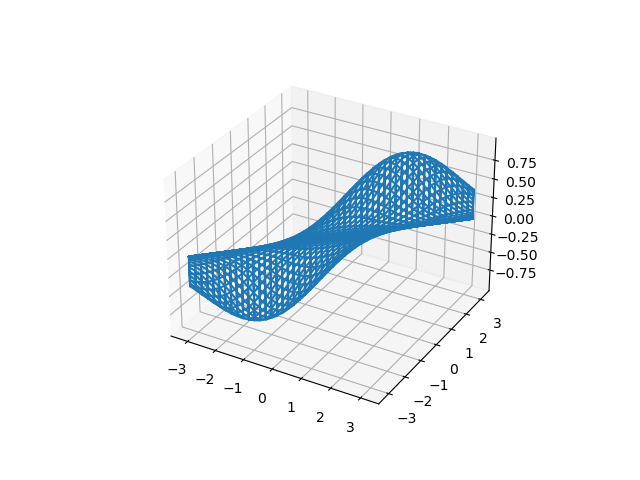

In [7]:
def gd(func,**fun):
    lim=fun['limits']
    lr=fun['learning_rate']
    s=signature(func)
    no_of_params=len(list(s.parameters))
    if no_of_params==1:
        der=fun['xder']
        xbase=np.linspace(lim[0],lim[-1],2000)#step1
        ybase=func(xbase)
        xb=np.linspace(lim[0],lim[-1],10)#step2
        yb=func(xb)
        yb=list(yb)
        ymin=min(yb)
        for i in range(len(yb)):
            if yb[i]==ymin:
                start=xb[i]
                break
        return start,lr,func,der,no_of_params,xbase,ybase#step3
    else: 
        xbase=np.linspace(lim[0][0],lim[0][-1],2000) #step1
        ybase=np.linspace(lim[-1][0],lim[-1][-1],2000)
        X,Y = np.meshgrid(xbase,ybase)
        zbase=func(X,Y)
        xder=fun['xder']
        yder=fun['yder']
        xb=np.linspace(lim[0][0],lim[0][-1],10)#step2
        yb=np.linspace(lim[-1][0],lim[-1][-1],10)
        zb=func(xb,yb)
        zmin=min(zb)
        for p in range(len(zb)):
            if zb[p]==zmin:
                x_start=xb[p]
                y_start=yb[p]
                break
        return x_start,y_start,lr,func,xder,yder,no_of_params,xbase,ybase,zbase#step3
            
        
#1D Polynomial   
#bestx,lr,func,der,no_of_params,xbase,ybase=gd(f1,xder=f1d,limits=xlim1,learning_rate=0.1)
#1D Trigonometric
#bestx,lr,func,der,no_of_params,xbase,ybase=gd(f5,xder=f5d,limits=xlim5,learning_rate=0.1)
#2D function
bestx,besty,lr,func,xder,yder,no_of_params,xbase,ybase,zbase=gd(f4,xder=f4_dx,yder=f4_dy,limits=[xlim4,ylim4],learning_rate=0.1)
#2D polynomial
#bestx,besty,lr,func,xder,yder,no_of_params,xbase,ybase,zbase=gd(f3,xder=df3_dx,yder=df3_dy,limits=[xlim3,ylim3],learning_rate=0.1)
if no_of_params==1: #step4
    fig=plt.figure()
    ax=plt.axes()
    xall, yall = [], []
    ax.plot(xbase,ybase)
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
else: 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) #creating 3d plots
    xall,yall,zall=[],[],[]
    ax.plot_wireframe(xbase,ybase,zbase)
    lnall, =ax.plot([],[],[],'ro')
    lngood, =ax.plot([],[],[],'go',markersize=10)

def onestepderiv(frame): 
    global bestx, lr,func,der
    x = bestx-(der(bestx)* lr) 
    bestx = x
    y = func(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,
def twostepderiv(frame): 
    global bestx,besty, lr,func,xder,yder
    x = bestx-(xder(bestx,besty)* lr) 
    y = besty-(yder(bestx,besty)* lr)
    bestx = x
    besty = y
    z = func(x,y)
    lngood.set_data_3d(x, y,z)
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data_3d(xall, yall,zall)
    return lngood,

- This is the code I have written for all the four plots.
- Here I have defined three functions : gd,onestepderiv,twostepderiv.
- gd function is defined to get all the parameters required for onestepderiv function inspite of no. of parameters a function requires.
- Inputs for the gd function is func (function of the plot) and **fun (kwargs=keyword arguments) so that function receives a dictionary of arguments as we don't know the how many keyword arguments are passed to that function.
- 'signature' function is used to find the no. of parameters taken by the func, such that i can classify it to 1D or 2D function.
- From **fun dictionary, I got learning_rate,limits accordingly, derivative of the function (if it is 2D function we will have derivative with respect to x and with respect to y).
- step1 :In this we created a set of x values(for 1D function) (x and y values for 2D function)  in the given limits range and found the values of the function values y(for 1D function)(z for 2D function). These are used to plot the function.
- step2 : In this again we are creating nearly 10 points within the range of the limits and evaluated it's corresponding function values. I want to find the starting point of systematic process of gradient descent given in presentation, It is helpful when the function has many local minimas. After evaluating those function values, we find the point at which the minimum of those set of values occur and assigning it as a starting point.
- step3 : We will return the values required for onestepderiv and twostepderiv functions.(bestx,besty:starting point;xder,yder:derivatives;xbase,ybase,zbase: used to plot the function,lr:learning rate,func:function,no_of_params: to find whether the function is 1D OR 2D, to create the figure and axis accordingly )
- step4: 
 1. to create figure and axes of the plot and plot the function
 2. for animation we create lnall, which plots all the values we get from onestepderiv and twostepderiv functions whereas lngood, indicates the final minimum value found.
- onestepderiv function is used for 1D function, where we use systematic way of gradient descent same as given in presentation.
- twostepderiv function is used for 2D function, similar to the onestepderiv function.
- Basically in this function we will have a start point and calculate the gradient of that point.
- If gradient=0 that's the extrema it can be minima or maxima , it depends on the starting point. So I chose starting point as  minimum of 10 points, to not to stop at global maxima.
- If gradient<0 then the minimum is at the point right to it. So we increase the x value in 1D function and x,y values in 2D function by the learning rate times the gradient at that point.
- If gradient>0 then the minimum lies at the point left to it. So we decrease the value of coordinates same as above.

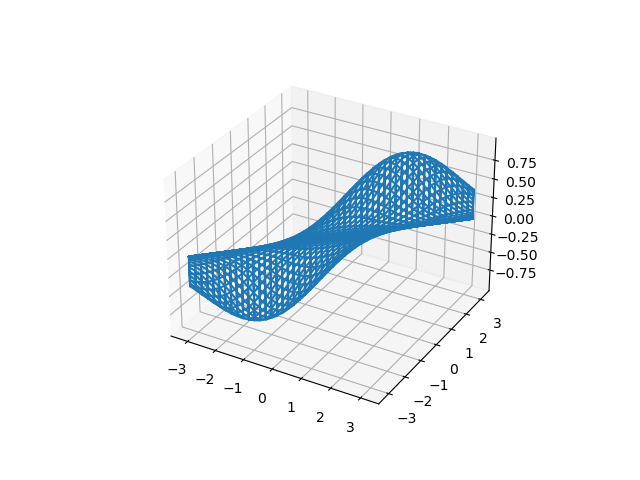

In [8]:
if no_of_params!=1 :ani= FuncAnimation(fig, twostepderiv, frames=range(100), interval=10, repeat=False) #2D function
else : ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=10, repeat=False) #1D function
plt.show()

- FuncAnimation is used to animate the process it reaches the minimum point of the function with in 100 frames (here we took 100)

###### NOTE:
- First import the libraries which u require.
- Run the user defined function before you use it in some other cell.

- This is an .ipynb file, which we can run in Jupyter notebook or Jupyter lab.
- In Jupyter lab, we need to upload this document to the workspace and start editting and running.
- In jupyter notebook, which is a local host of our pc, we need to know where the file is located, opening this file is same as we do in file manager.
- To open in jupyter notebook, first we need to unzip the file i.e., extract all the files from it and open the ipynb file.